# MSDS7331 Final Project

### Team Member Names:
- Name : Adarsh Kannan
- Name : Mooyoung Lee
- Name : Sunna Quazi
- Name : Elisabet Zidow

# <div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">The Book Crossing Dataset</span></div> 
<div style="text-align:center"><span style="color:blue; font-family:Georgia; font-size:2em;">Data on Book Reviews</span></div>

Data source: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

# Business Understanding

## A. Purpose of the data set:

The data is available to download from the University of Frieberg and was mined by one of their professors Cai-Nicolas Ziegler along with the University's Databases and Information Systems department. The data was collected by Book Crossing Community between August and Sepetember of 2004, and although it was mined in only four weeks, it contains data on over 275 thousand books. We attribute this success to the grassroots organic nature of the Book Crossing Community. It is basically a global sociological experiment that occured before the massive advent of social networks. The premise is that a book owner graciously "releases their book into the wild" by leaving their book somewhere to be picked up by a stranger. The stranger then picks it up, registers the book for the previous owner to see the journey, and then repeates the process. Although there seems to be some flaws in this premise, this network has been alive and running since 2001 and has books have travelled to 132 countries.
We believe that the altruistic nature of this dataset makes it critical for recommender analysis because the curated data entirely removes the financial aspect of book owning. This way, the reviews and ratings obtained from each book adventure only comprises of the pure satisfaction obtained by the book and not muddled with the monetary cost of obtaining the book. We also prefer this dataset to others because books, as opposed to other similar items like movies, are ageless as they do not become unrelevant as easily, so reviews obtained on them during a particular period do not expire over time.


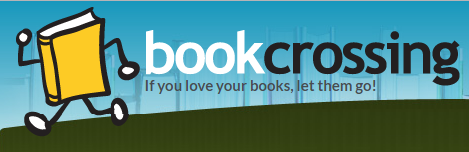

In [1]:
from IPython.core.display import Image
Image(filename=('book.png'))

## B. How to measure the effectiveness of a good algorithm?
### Available accuracy measure

There are three accuracy measures that determine the effectiveness of a good algorithm. These are the Root Mean Squared Error (MSE), the Mean Absolute Error (MAE), and the Fraction of Concordant Pairs (FCP). The MSE measures the significant difference between the predicted value per the model and the actual observed value. Basically, this is the sample standard deviation for the aforementioned difference. The smaller, the root mean squared error, the more effective algorithm would be. However, when comparing two different algorithms, the difference in the MSE must be significant enough to matter. The MAE is the difference between two continuous variables. The MAE is usually smaller than the MSE. The MAE is also less affected by aberrational large errors because in its calculation, the errors are not squared. Like the MSE,  a lower MAE value indicates a stronger and more effective algorithm. MAE also accounts for average error. The FCP looks at two lists and ranks the data points in terms of numerical value. The values for FCP ranges from 0 when there is no concordance and 1 when there is perfect concordance. Unlike MSE and MAE, the higher the FCP, the more effective an algorithm is. 

We are going to use RMSE to compare and find the best algorithm for our dataset. An algorithm with the lowest RMSE will most likely give the best accuracy in a recommendation system. 

## C. Validation method make sense for this dataset and stakeholders need?
Our purpose is to discover the highest rated books based on user experience as opposed to just web trafficking data or sponsored ads that most retail systems, like Amazon (whose url's are referenced in this dataset), often subscribe to. Amazon, as we know focuses on a myriad of products, and it's version of a recommender system may be exceptional for products like appliances or apparel, but it does not fit all types of SKU's. Using a recommender system based on genuine user feedback makes the recommender system itself a product and allows the business to offer a better curated hiearchy of books based on its inventory. This unique approach to suggesting novels focuses on user satisfaction, after the transaction is made, which is unique to book data because the act of consuming a book  takes significantly longer than other products since the entire book must be read for the user to evaluate it. This recommender system also is essential to discovering the entire circumference to a user's book interest. Too often we look up a book on data mining to pass a class and are thereafter bombarded by similar books based on our search history. The result is that any other nuanced interests we may have like mystery novels or history are stifled with the search engine's desire to sell sell sell. It makes more business sense to not campaign on the most recently expressed interest because the user does not need any additonal convincing to buy that genre. Rather, the business should take the opportunity to remind the user of previously enjoyed genres, like the latest John Grisham release, in order for the business to capitalize on selling more breadth, as opposed to depth, of its book inventory.

# Data Understanding 1

The data is seperated into three csv files, which contains Book Ratings, Users, and Book information.

### Book Data:
| | | | |
|-|-|-|-|
| ISBN                | Numeric | Quantitative | Continuous |
| Book Title          | Text    | Qualitative  | Nominal    |
| Book Author         | Text    | Qualitative  | Nominal    |
| Year of Publication | Numeric | Quantitative | Interval   |
| Publisher           | Text    | Qualitative  | Nominal    |
| Image URL -s        | Text    | Reference    | Nominal    |
| Image URL -m        | Text    | Reference    | Nominal    |
| Image URL -l        | Text    | Reference    | Nominal    |

### User Data:
| | | | |
|-|-|-|-|
| User ID  | Numeric | Quantitative | Ratio    |
| Location | Text    | Qualitative  | Nominal  |
| Age      | Numeric | Quantitative | Interval |

### Rating: 
| | | | |
|-|-|-|-|
| User ID     | Numeric | Quantitative | Ratio      |
| ISBN        | Numeric | Quantitative | Continuous |
| Book Rating | Numeric | Quantitative | Ordinal    |



## Data Definitions
* ISBN: ISBN stands for 'International Standard Book Number'. It is a unique numeric commercial identifier that consists of 13 digits. This serves as our primary key for the Book Data.
* Book Title: The title of the book according the the ISBN
* Book Author: The author of the book according to the ISBN
* Publisher: The publishing house corresponding to the ISBN
* User ID: Each user is given a unique id ranging from 1 to 275081
* Location: The 'location' feature contains 'city' 'state' and 'country' information.
* Age: Age values that range from 0 to 244 prior to transformation
* Book Rating: The scale of 'rating' is 1 to 10 where 10 is the best rating score for each book
* Image URL -s: URL to find small images of the book on Amazon's website
* Image URL -m: URL to find medium images of the book on Amazon's website
* Image URL -l: URL to find large images of the book on Amazon's website

## Data Quality

The raw data will be loaded and the quality of data will be examined in this section.

#### A. Missing data:
- The ratings dataset has no missing values. However, more than 62% of values are 0 for the rating.  Based on the histogram of the ratings in Figure A, the 0-value may indicate that a book was picked up but not reviewed. However, this still leaves us with 176,019 entries with valid ratings, which is still a substantial dataset. 

- For the users dataset, the 'age' feature shows about 40% or 110,762 samples of missing data. This is understandable because most individuals are hesitant to disclose their age. The rest of the features in the users dataset has no missing values.

- For the items dataset, 2 are missing from 'Publisher' feature and 3 are missing from 'Image-URL-L' feature. 

#### B. Outliers:
- The age data has a maximum of 244 and there were 78 cases where the age value is greater than 120 years which is suspicious. The boxplot in Figure B goes onto confirm that any age greater than approximately 80 is an outlier in this dataset and confirms that they should be ignored by being considered null. Since we already have a significant amount of non-responses for this field it seems reasonable to add 78 more NA's to age.

#### C. Duplicated data:
- There was no duplicated data in all files as a series.  'user_id' from 'users' dataset and 'ISBN' from 'items' dataset have no duplication. This is great news because ISBN's by nature are unique and not having duplicate user id's gives us greater faith in Book Crossing's data integrity and database management.

#### D. Inconsistent data:
- The location information in the 'users' file have various data structure.  The number of separators are different, and the language is also different. 

#### E. Missing side feature data:
- Not all 'items' feature information(e.g. "Book-Author", "Year-Of-Publication","Publisher") are available for the items(ISBN) in the 'ratings' table. About 10% of 'items' feature information is not available.  

### Actions for the quality of data:

- Basic recommender analysis only needs rating data with related user and product IDs. The 0-value rating will not be useful for the recommender and the rating seems not generated by the users so the 0-value ratings will be removed. 
- Side features from items and users data sets can be optimized to improve performance of recommender.  From the user dataset, the 'age' feature will be dropped since 40% of data is missing and there are many obscure outliers.  Also, the 'city' feature from the users dataset will be dropped because 'state' and 'country' features seem good enough to indicate the location of users. 
- From the items dataset, 'Book-Title' and image URL features will be removed since they are all unique.  The 'Publisher' feature will be converted with a hash function since some foreign language have issue with the Graphlab SFrame.  
- Inconsistent user location data can be fixed in the future but it is not the priority. 
- The missing side feature information on the 'items' table will be filled with 'NA'.  10% missing side data seems reasonable to ignore.

#### Loading raw data files

In [2]:
# load raw data files.

import pandas as pd

#Reading ratings file:
r_cols = ['user_id', 'ISBN', 'rating']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1', skiprows  =1)

#Reading users file:
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('BX-Users.csv', sep=';', names=u_cols, encoding='latin-1', skiprows  =1)

#Reading items file:
i_cols = ["ISBN", "Book-Title", "Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]
items = pd.read_csv('BX-Books.csv', sep=';', names=i_cols, encoding='latin-1', skiprows  =1)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Missing value check

In [3]:
# Missing data check

print "Null value count for Ratings dataframe\n",ratings.isnull().sum();
print "\nNull value count for Users dataframe\n", users.isnull().sum();
print "\nNull value count for Items dataframe\n",items.isnull().sum()

SyntaxError: invalid syntax (<ipython-input-3-f6de1727d90b>, line 3)

#### Missing value Ratio

In [ ]:
# % null value in the 'users' table
users.isnull().sum()/len(users)

#### Duplicated rows check

In [ ]:
# Duplicated data in series

print ("Number of duplicated data in Ratings = ", sum(ratings.duplicated()))
print ("\nNumber of duplicated data in users = ", sum(users.duplicated()))
print ("\nNumber of duplicated data in items = ", sum(items.duplicated()))


#### Duplicated ID and ISBN check

In [4]:
# Duplicated data in each column

print ("Number of duplicated data in users/User_ID = ", sum(users.duplicated('user_id')))
print ("\nNumber of duplicated data in items/ISBN = ", sum(items.duplicated('ISBN')))

Number of duplicated data in users/User_ID =  0

Number of duplicated data in items/ISBN =  0



#### Book-Rating distribution
### Figure A. Book-Rating

Ratio 0-value rating =  716109
Length of ratings table =  1149780


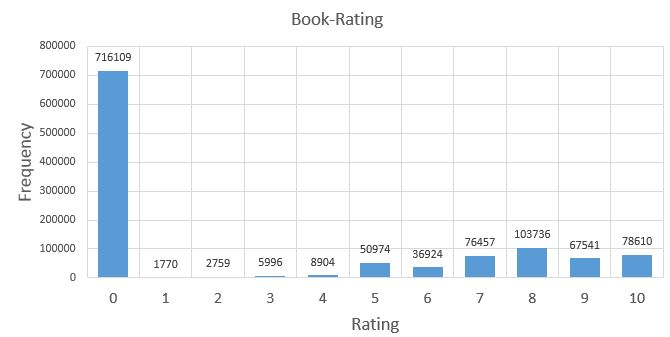

In [5]:
# book rating histogram
# Below image is genearted by Excel (any plotting method was not working with this version/environment)
    
print ("Ratio 0-value rating = ",  sum(ratings['rating']==0))
print ("Length of ratings table = ", len(ratings))

from IPython.display import Image
Image(filename='hist_bookRating.JPG') 

### Figure B. Outliers in Users/Age

Max age =  244.0

Number of observations age being higher than 120 years =  78


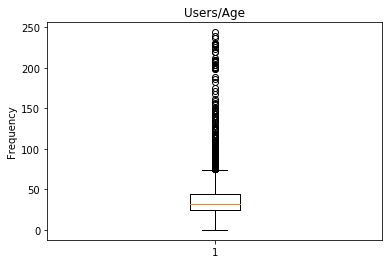

In [6]:
# User/ Age information
import matplotlib.pyplot as plt 
import numpy as np
age = users.age.as_matrix()
age = age[~np.isnan(age)]

print ("Max age = ", max(age))
print ("\nNumber of observations age being higher than 120 years = ", len(users.age[users.age >120]))

# Boxplot Age
plt.boxplot(age)  # not working with v2.7?
plt.title("Users/Age")
plt.ylabel('Frequency')
plt.show()

#### Data cleaning

See above "Actions for the quality of data" for details.

In [8]:
# Data modification:
    # drop rating = 0
    # drop age, city from users and fetch state and country information
    # fillna('unknow') for users, items
    # hash('Publisher') from items
    # drop "Book-Title","Image-URL-S","Image-URL-M","Image-URL-L" from items

    
# ratings dataset
ratings1 = ratings[ratings['rating']>0]
    
    
# users dataset
state = []
country = []
for s in users.location:                     # split location data
    state.append(s.split(',')[-2:-1])
    country.append(s.split(',')[-1])
users1 = pd.DataFrame(data={'user_id':users.user_id, 'state': state, 'country': country})
# users1['state'] = users1['state'].str[0]     # remove square bracket; Issue w/ foreign language
users1.fillna('unknown')

# items dataset
items1 = items
items1["Year-Of-Publication"] = items1["Year-Of-Publication"].astype('str')
items1.fillna(value = 'unknown')
# items["Publisher"] = unicode(items["Publisher"])
# items["Publisher"] = items["Publisher"].astype('str')
# items["Publisher"] = items["Publisher"].str.encode('utf-8','ignore')
items1["Publisher"] = items1["Publisher"].apply(hash)
items2 = items1[["ISBN", "Book-Author", "Year-Of-Publication","Publisher"]]

#### Missing side feature data
- 10.3% of detail book information in 'items' table is missing for the books(ISBN) in 'ratings' table.

In [9]:
# Mapping count between 'ratings' and 'items' tables

ratingMap = ratings['ISBN'].map(items['ISBN'].value_counts())
print 'Ratio of missing side feature data for the ratings/ISBN = ', round(sum(np.isnan(ratingMap))/float(len(ratings)),3)

Ratio of missing side feature data for the ratings/ISBN =  0.103


#### Initially loaded raw files

In [10]:
print "\n", ratings1.shape
ratings.head()


(433671, 3)


,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### There are 433,671 reviews in the Ratings dataset with three descriptive attributes

In [11]:
# print dataset

print users1.shape
users1.head()

(278858, 3)


,country,state,user_id
0,usa,[ new york],1
1,usa,[ california],2
2,russia,[ yukon territory],3
3,portugal,[ v.n.gaia],4
4,united kingdom,[ hants],5


### There are 278,858 users in the Users dataset with three descriptive attributes

In [12]:
print "\n", items2.shape
items2.head()


(271379, 4)


,ISBN,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Mark P. O. Morford,2002,-788360348
1,0002005018,Richard Bruce Wright,2001,397636016
2,0060973129,Carlo D'Este,1991,-1389256723
3,0374157065,Gina Bari Kolata,1999,524052298
4,0393045218,E. J. W. Barber,1999,-750144698


### There are 271,379 books in the Items dataset with four descriptive attributes


# Data Understanding 2 (data sets for modeling)

The summary of each data set(ratings, users, items) is provided below with summary stats and graphical representations into box plots and frequency bars.
 
There are 433,671 ratings from 77,533 users. 188,153 books are rated by users. The median value of rating is 8, and the box plot below indicate the distribution is skewed to lower rating values. (Figure C)
 
278,858 users IDs exist.  The most frequent location of users are the USA for the country and California for state based on the frequency bars shown below. Because there are some typos and mismatching location information, the unique number of countries appears to exceed 700, when it should actually be lower than 200 since there are only 195 countries currently and there might have been even less in 2004.  This location information will be revisited if needed. (Figure D)
 
There are 271,379 book items, and the top most frequent authors for the items in this dataset is shown below with a bar frequency plot.  The year of publication bar plot below indicate that this dataset include more books for newer years in general except the year of 2003.  There are 16,879 different publishers. (Figure E)
 
We used both the GraphLab and Scikit-Surprise package in our modeling analysis.  Ultimately SciKit-Surprise provided that best predictive results (based on RMSE), however GraphLab utilize side information and provided some of the nicer intutive graphics for data understanding that you will find.

#### Data format change
- SFrame is a data format that the Graphlab only takes.  Graphlab modeling is pushed to 'Exceptional Work' section.  We found that the models using the Scikit-Surprise library give better accuracy than the Graphlab models so we only listed Surprise models in the body of this report to make easy to follow.
- Cleaned datasets for ratings, users, and items are converted into SFrames for Graphlab modeling. Scikit-Surprise have their own data 'Reader' so the cleaned ratings dataframe will be converted into Surprise dataformat.  

In [13]:
# Convert data type for SFame requirements.

import graphlab as gl

SF_ratings = gl.SFrame(ratings1)
SF_users = gl.SFrame(users1)
SF_items = gl.SFrame(items2)

# Actual modeling data set with all hash values except user_id and item_id(ISBN) 
    # This avoid unicode issue due to foreign language
# users2 = users1
# users2['state'] = users2['state'].apply(hash)
# users2['country'] = users2['country'].apply(hash)
# SF_usersHash = gl.SFrame(users2)

items3 = items2
items3['Book-Author'] = items3['Book-Author'].apply(hash)

SF_itemsHash = gl.SFrame(items3)

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\JOSHUA~1\AppData\Local\Temp\graphlab_server_1512921886.log.0


This non-commercial license of GraphLab Create for academic use is assigned to mooyoungl@mail.sum.edu and will expire on November 30, 2018.


C:\Users\Joshua Caleb\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Sframe summary and graph outputs
Please see above 'Data Understanding 2' for detail description about below tables.

### Figure C. Ratings Summary

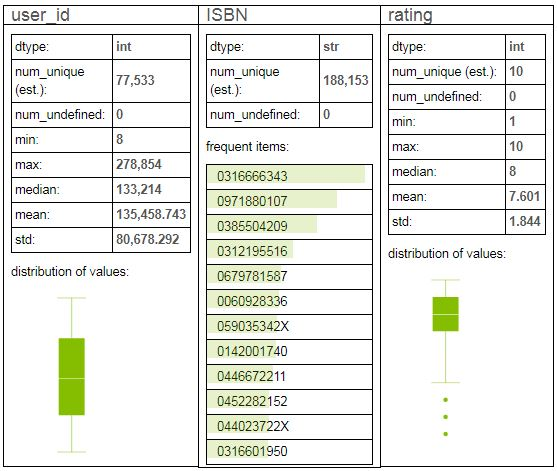

In [14]:
# Ratings dataset summary
# gl.canvas.set_target('ipynb')
# SF_ratings.show()
Image(filename='ratings.JPG')   # replaced with image file since this output is not reliably saved. 

### Figure D. Users Summary

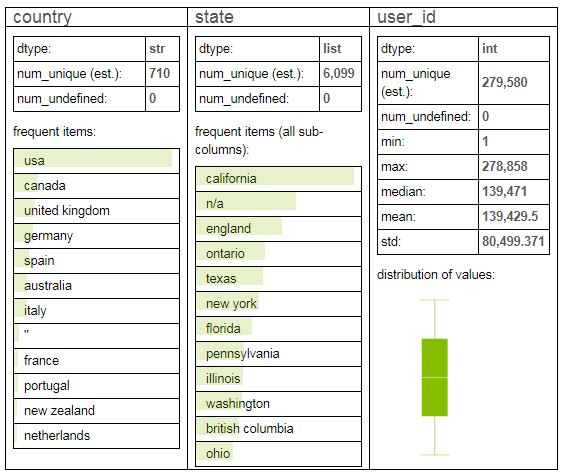

In [15]:
# Users dataset summary
# SF_users.show()
Image(filename='users.JPG') 

### Figure E. Items Summary

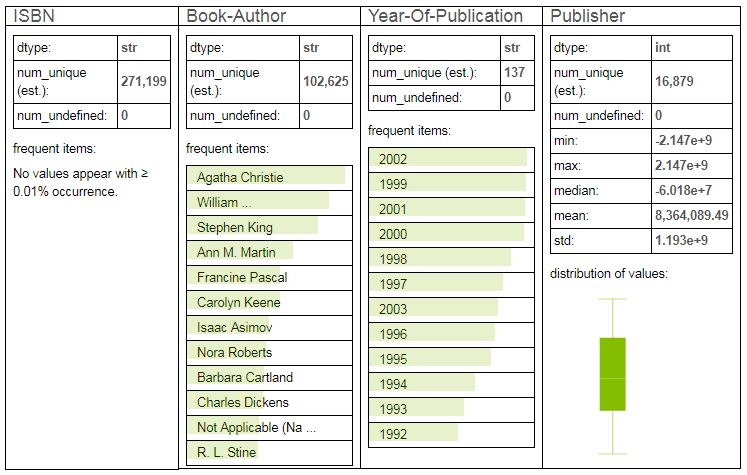

In [16]:
# Items dataset summary
# SF_items.show()
Image(filename='items.JPG') 

# Modeling with Scikit-Surprise Library


# Modeling and Evaluation 1 (Train and adjust parameters)

Scikit-Surprise library is utilized to generate a recommender.  Multiple algorithms are tested with the book ratings data.  SVD algorithm showed the best performance over other algorithms (NMF, BaselineOnly, CoClustering) (Figure F).  SVD algorithm is furthur optimized.  The best parameters for the SVD was {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1} for our dataset. 

Our research identified benchmarking results done in Scikit-Surprise on Movie Ratings data which is very similar to both the structure and purpose of our analysis.  In that benchmark a host of algorithms available in Surprise were tested against one and another for effectiveness and run time on large and small datasets.  Based on these benchmarking results our expectation was that SVD, SVD++ and NMF would perform very well but that SVD++ is not very scalable to large datasets so we omitted from our testing.

Scikit-Surprise contains both Similarity algorithms (discussed later as part of Deployment Considerations) and predictive algoriths across a few algorithm families.  Both SVD and NMF are in the matrix factorization category of algorithms with SVD being wellknown as popularized by Simon Funk during the Netflix Prize.  Surprise also contains three algorithms in the KNN familiy, a few basic algorithms and a Co-clusting algorithm; we briefly tested KNNBasic and it performed only about as well as the BaselineOnly well represented in the code below.

We settled on these 4 algorithms within Surprise to understand the varied performance and find the right algorithm to optimize with: SVD, NMF, BaselineOnly, CoClustering

#### Surprise algorithms description:
- Coclustering: This is a collaborative filtering algorithm based on co-clustering.  Co-clustering separate users and items into some user, item, and user-item clusters and predict ratings.  
- BaselineOnly: This algorithm predict ratings using an average rating value with user and item bias terms.
- SVD: SVD works similar to PCA dimension reduction algorithm.  SVD run PCA twice along the rows and columns. With this SVD algorithm a large dataset with more than 100 million movie ratings can be trained efficiently. 
- NMF: This is a collaborative filtering algorithm based on Non-negative matrix factorization.  This is similar to SVD but user and item factors are kept positive.  

## A. Algorithm selection

RMSE of rating prediction is measured using following Surprise algorithms:  SVD, NMF, BaselineOnly, and CoClustering. Three-fold cross validation is used.

In [1]:
# Algorithm selection from Scikit-Surprise

from surprise import SVD, NMF, BaselineOnly, CoClustering
from surprise import Dataset, Reader, evaluate, print_perf
import pandas as pd

# Read ratings file
r_cols = ['user_id', 'ISBN', 'rating']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', names=r_cols, encoding='latin-1', skiprows  =1)
ratings1 = ratings[ratings['rating']>0]

# read from our dataframe
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings1[['user_id', 'ISBN', 'rating']], reader) 
                            
# list of algorithms
data.split(n_folds=3)
algoList = [BaselineOnly(),  SVD(), NMF(), CoClustering()]

# Evaluate performances
performance = []
for i, algo in enumerate(algoList):
    perf = evaluate(algo, data, measures=['RMSE', 'MAE', 'FCP'])
    performance.append(perf)
    

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 1.6495
MAE:  1.2835
FCP:  0.4602
------------
Fold 2
Estimating biases using als...
RMSE: 1.6559
MAE:  1.2858
FCP:  0.4588
------------
Fold 3
Estimating biases using als...
RMSE: 1.6547
MAE:  1.2863
FCP:  0.4696
------------
------------
Mean RMSE: 1.6534
Mean MAE : 1.2852
Mean FCP : 0.4629
------------
------------
Evaluating RMSE, MAE, FCP of algorithm SVD.

------------
Fold 1
RMSE: 1.6447
MAE:  1.2720
FCP:  0.4443
------------
Fold 2
RMSE: 1.6504
MAE:  1.2743
FCP:  0.4416
------------
Fold 3
RMSE: 1.6502
MAE:  1.2742
FCP:  0.4437
------------
------------
Mean RMSE: 1.6484
Mean MAE : 1.2735
Mean FCP : 0.4432
------------
------------
Evaluating RMSE, MAE, FCP of algorithm NMF.

------------
Fold 1
RMSE: 2.4386
MAE:  2.0174
FCP:  0.4707
------------
Fold 2
RMSE: 2.4475
MAE:  2.0258
FCP:  0.4704
------------
Fold 3
RMSE: 2.4425
MAE:  2.0201
FCP:  0.4688
------------
-------

### Figure F. RMSE by Algorithm

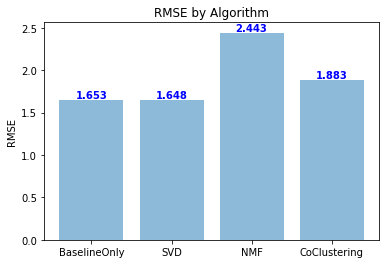

In [2]:
# plot mean RMSE output for each algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mean_RMSE = [np.mean(performance[i]['rmse']) for i in range (0,4)]

# pd.DataFrame(data = mean_RMSE)
objects = ['BaselineOnly',  'SVD', 'NMF', 'CoClustering']
y_pos = np.arange(len(objects))
fig, ax = plt.subplots()    
plt.bar(y_pos, mean_RMSE, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('RMSE by Algorithm')
for i, v in enumerate(mean_RMSE):
    ax.text(i-.2, v+0.02  , str(round(v,3)), color='blue', fontweight='bold')
plt.show()

### Optimization Technique Notes:
As shown in the graphic above SVD out performed the other three algorithms based on the most commonly used accuracy measure RMSE, so we move forward with SVD to optimize the predictive performance using the GridSearch libraries available within Surprise.  GridSearch also provides the function "best_parms" that we leverage below to identify the most effective hyperparameters.  

## B. Parameter Optimization

For the selected SVD algorithm, below parameters are tried using GridSearch function to find the best parameter configuration for lowering the RMSE of prediction.  Three-fold cross-validation is used in the GridSearch.

- n_epochs – The number of iteration of the SGD procedure.Default is 20.
- lr_all – The learning rate for all parameters. Default is 0.005
- reg_all – The regularization term for all parameters. Default is 0.02.

In [3]:
# Model Parameter optimization
from surprise import GridSearch

# dataset
data = Dataset.load_from_df(ratings1[['user_id', 'ISBN', 'rating']], reader) 
data.split(n_folds=3)

# Grid search
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.1, 0.5]}
grid_search = GridSearch(SVD, param_grid, measures=['RMSE', 'MAE', 'FCP'])
grid_search.evaluate(data)

Running grid search for the following parameter combinations:
{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.02}
{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.1}
{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.5}
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.1}
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.5}
{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.02}
{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.1}
{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.5}
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.5}
{'n_epochs': 30, 'lr_all': 0.002, 'reg_all': 0.02}
{'n_epochs': 30, 'lr_all': 0.002, 'reg_all': 0.1}
{'n_epochs': 30, 'lr_all': 0.002, 'reg_all': 0.5}
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.02}
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}
{'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.5}
Resulsts:
{'n_epochs': 10, 'lr_a

### Figure G. GridSearch Output
The best parameter configuration for SVD algorithm using our dataset is found to be {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}. As shown on the below chart, with all parameter changes only 0.05 of RMSE values were affected.  It seems like the the number of iteration of SGD(Stochastic Gradient Descent) was affecting the RMSE output the most.  

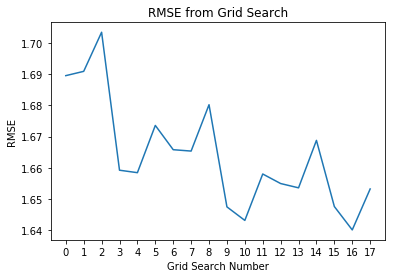

In [4]:
# grid search result
cv_result = pd.DataFrame(grid_search.cv_results)
RMSE_conf = [cv_result.scores[i]['RMSE'] for i in range(0,len(cv_result))]

# plot RMSE for all grid search configurations
plt.plot(RMSE_conf)
plt.xticks(np.arange(0, len(cv_result), 1.0))
plt.ylabel('RMSE')
plt.xlabel('Grid Search Number')
plt.title('RMSE from Grid Search')
plt.show()

In [5]:
print("Best parameters for the lowest RMSE = \n", grid_search.best_params['RMSE'])

Best parameters for the lowest RMSE = 
 {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}


# Modeling and Evaluation 2-3 (Evaluate, Compare, and Visualize Results)

The average RMSE using SVD algorithm with 10-fold cross validation is 1.628. The RMSE range for the cross-validation was 0.0313 (Figure H).

Before optimizing this SVD algorithm the RMSE value with 3-fold cross validation was 1.648 in Figure F. 'RMSE by Algorithm'.  Only RMSE by 0.02 is reduced with parameter optimization from the default SVD algorithm.  The RMSE shown on the same figure shows that the RMSE with NMF algorithms is much higher than the RMSE value with SVD algorithm.  Both use matrix factorization but the SCV use more terms to predict ratings.

#### 10-fold cross-validation with a final SVD model

In [6]:
data.split(n_folds=10)
algo = grid_search.best_estimator['RMSE']  # use the parameters found from grid search

# Evaluate performances
perf = evaluate(algo, data, measures=['RMSE'])

Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 1.6227
------------
Fold 2
RMSE: 1.6256
------------
Fold 3
RMSE: 1.6334
------------
Fold 4
RMSE: 1.6319
------------
Fold 5
RMSE: 1.6077
------------
Fold 6
RMSE: 1.6354
------------
Fold 7
RMSE: 1.6287
------------
Fold 8
RMSE: 1.6346
------------
Fold 9
RMSE: 1.6390
------------
Fold 10
RMSE: 1.6219
------------
------------
Mean RMSE: 1.6281
------------
------------


### Figure H. 10-fold cross-validation output

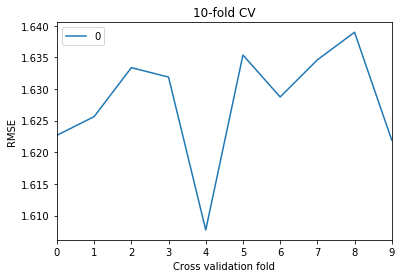

In [7]:
# cross-validation result
cv_result2 = pd.DataFrame(perf['rmse'])
cv_result2.plot()
plt.ylabel('RMSE')
plt.xlabel('Cross validation fold')
plt.title('10-fold CV')
plt.show()

### Figure I. RMSE with parameter optimization

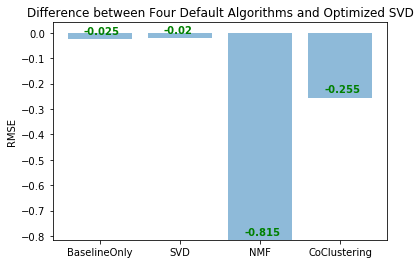

In [24]:
# RMSE chage with parameter optimization

change = [1.628-x for x in mean_RMSE]

objects = ['BaselineOnly',  'SVD', 'NMF', 'CoClustering']
y_pos = np.arange(len(objects))
fig, ax = plt.subplots()    
plt.bar(y_pos, change, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Difference between Four Default Algorithms and Optimized SVD')
for i, v in enumerate(change):
    ax.text(i-.2, v+0.02  , str(round(v,3)), color='green', fontweight='bold')
plt.show()

## Precision/Recall

In informatio retrieval area, precision is the fraction of retrieved document that are relevant to the query as shown on the below equation.  Recall is the fraction of the relevant documents that are successfully retrieved.  <https://en.wikipedia.org/wiki/Precision_and_recall#Definition_(information_retrieval_context)>

An item is considered relevant if its true rating(r_ui) is greater than a given threshold. An item is considered recommended if its estimated rating(r_ui_hat) greater than the threshold, and if it is among the k highest estimated ratings. <http://surprise.readthedocs.io/en/stable/FAQ.html>

We calculated the precision and recall using the k-value of 10 and the threshold of 8.  According to our own rule, the relevant books and recommended books should have ratings higher than 8.  Then the precision and recalls were calculated based on the books that got the rating value of 10.  

The precision and recall values with 10-fold cross-validation using SVD algorithm are same as below:
- Precision:    0.939
- Recall   :    0.554

94% of recommended books got the 10 ratings which user actually liked. 55% of recommended books have 10-rating out of all books that user likes. However, this precision and recall values cannot be compared with other algorithms unless the k and threshold values are consistent.  Thus, the RMSE value is why we picked to compare the accuracy of recommender algorithms.

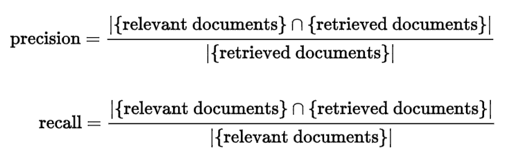

In [28]:
Image(filename='precision_def.png')

In [8]:
# Precesion/Recall Calculation

# Source: <http://surprise.readthedocs.io/en/stable/FAQ.html>

from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


data = Dataset.load_from_df(ratings1[['user_id', 'ISBN', 'rating']], reader) 
data.split(n_folds=10)
algo = grid_search.best_estimator['RMSE']  # use the parameters found from grid search

Precision = []
Recall = []
for trainset, testset in data.folds():
    algo.train(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=8)  # UPDATE k, threshold  <---------

    # Precision and recall can then be averaged over all users
    Precision.append(sum(prec for prec in precisions.values()) / len(precisions))
    Recall.append(sum(rec for rec in recalls.values()) / len(recalls))

#### 10-fold cross-validation for Precision/Recall

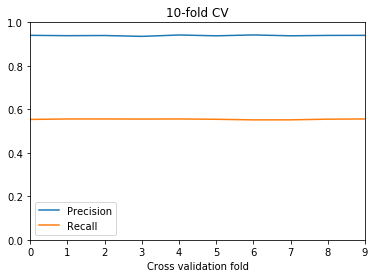


Mean precision and recall : 
 Precision    0.939474
Recall       0.554389
dtype: float64


In [9]:
# precision/recall output
acc_result = pd.DataFrame({'Precision': Precision, 'Recall': Recall})
acc_result.plot(ylim = (0,1))
plt.xlabel('Cross validation fold')
plt.title('10-fold CV')
plt.show()
print('\nMean precision and recall : \n', np.mean(acc_result))

# Modeling and Evaluation 4 (Summarize the Ramifications)

Four algorithms(SVD, NMF, BaselineOnly, and CoClustering) from Scikit-Surprise library were tested to minimize the prediction RMSE.  With default parameter settings, SVD showed the lowest RMSE.  RMSE value for BaselineOnly model was about same as the SVD model. The RMSE for NMF CoClustering models were about 48% and 14% higher than the RMSE from SVD model accordingly.  

With a parameter optimization for the SVD model, the RMSE value reduced by 0.02 which has no practival significance (Figure I). The best parameters using our dataset was {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1}.  GridSearch parameters were the interation number for Stochastic Gradient Descent(SGD), learning rate, and regularization term.  Among three parameters, the SGD iteration limit showed the largest influence to the RMSE value but still had no practical significance (Figure G).
 
For a non-standard accuracy measure, precision and recall only for specific ratings were checked. Relavance is measured with only rating higher than 8, and only user rating 10 is collected for the precesion and recall estimation.  Precision was 0.94 and the recall was 0.55.  Thus, our recommender model predict precisely but not picking all 10 ratings.  

Thus, our SVD model from Scikit-Surprise library showed prediction RMSE of 1.628 in average from the 10-fold cross-validation (Figure H). This is a standard measure that we can compare prediction accuracy with other models from other libraries. 

# Deployment


Our model will be used to generate a Top-N recommendation dictionary as shown below.  The user/company should decide the number of recommended product/book in the dictionary with memory and computing performance in mind.  Then the recommended book list with images can be sent to the final user/customer through user applications as shown on the below Figure J.  The update and maintenece of this recommender model need to be continuous.  Every week or day the company need to update this recmomender model with new products; otherwise, they will miss to sell new products.  To improve performance of this recommender one can collect genre information of the books which is missing from our item dataset.  Some key words, phrases, or abstract summaries can be extracted by automatic summarization algorithms and be used for item side information.  With extra side information, the recommender will most likely perform better.  

We chose to focus on product recommender predictors specifically;  this provided a nicely customized model to suggest other titles of interest for known customer.  However when going to deploy recommendations in a production environment there is not just one algorithm and decision point with which to provide a strong recommendation. Predictive recommendation algorithms can be hamstrung by brand new customers, and even by customers that have not rated many 'product's.  Product recommendation algorithms are at the heart of personalization, yet we often have varying levels of information with which to provide a personalized recommendation.  Notably an algorithm such as SVD does well for customers that already have 'many' instances in which they've rated other works with which to infer their interests from.  However these algorithms are also very weak when it comes to providing relevant recommendations to customers that have not rating very many other works, books or products.  This necessitates a multi-pronged approach in dealing with the different customers. For customers that do not have many and any documented ratings, approaches the leverage Simalarity algorithms and Popularity algoritms also need to be an integral part of the deployment environment.  

In a 2014 paper, Daniel Kluver and Joe Konstan found that for customers that have entered less than 4 ratings, a baseline ItemItem recommendation was more effective.   In the exceptional work section below we demonstrate the creation of Popularity and Similarity models found in GraphLab.  For a brand new, or anonymous customer Popularity models provide the right initial suggestion to new customers.   While Similarity models, also shown in GraphLab below, help overcome issues with customers that haven't rated many products but are shopping in a particular genre.

So to deploy our book recommendation model effectively, a decision framework must be constructed within with it executes for customers that are known and have rated several books with which to guage their tastes.  This decision framework would execute either Popularity or Similarity models for other customers based on the level on knowledge/engagement of that customer.  This provides and effective interaction and recommendation within the framework. 


### Top-N Recommendation Dictionary

In [10]:
# Top-N Recommendations
from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm
ratings2 = ratings1.sample(frac = 0.01, replace = False)
data = Dataset.load_from_df(ratings2[['user_id', 'ISBN', 'rating']], reader) 
trainset = data.build_full_trainset()
algo = grid_search.best_estimator['RMSE']
algo.train(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=5)    # <---------- UPDATE TOP-N VALUE

# Print the recommended items for a selected user
# for uid, user_ratings in top_n.items():

# print(uid, [iid for (iid, _) in user_ratings])

In [11]:
# User ID look up
ratings2.head()

,user_id,ISBN,rating
215537,50394,8435033546,6
585116,141256,0312300824,5
1069205,255421,0767902890,8
851635,205943,059600026X,9
1101832,264423,8432022160,5


### Figure J. Recomender output

Type valid ID value and then recommended books will be printed.

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


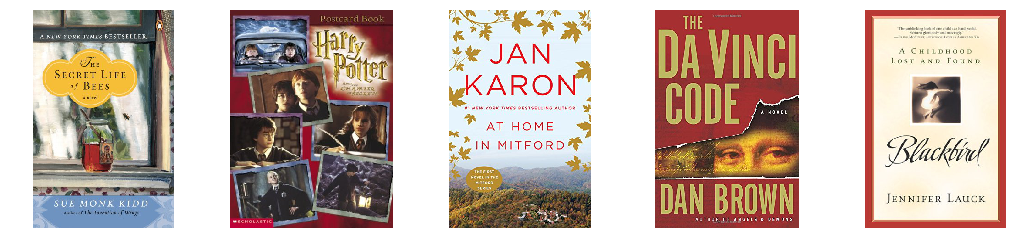

Rocommended books = 
 0                              The Secret Life of Bees
1    Harry Potter and the Chamber of Secrets Postca...
2               At Home in Mitford (The Mitford Years)
3                                    The Da Vinci Code
4                Blackbird: A Childhood Lost and Found
Name: title, dtype: object


In [16]:
# Print Recommended Books

from IPython.display import Image
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

ID = 50394   # ENTER VALID USER ID   <-------------------- Pick one ID from above dataframe

BookID = [id for (id, _) in top_n.get(ID)]
Recommend = pd.DataFrame({'ISBN':BookID})

# map ISBN with Image-URL (This mapping section should be separated out for a repeated use)
#Reading items file:
i_cols = ["ISBN", "Book-Title", "Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L"]
items = pd.read_csv('BX-Books.csv', sep=';', names=i_cols, encoding='latin-1', skiprows  =1)

Recommend['url'] = Recommend['ISBN'].map(items.set_index('ISBN')['Image-URL-L'].to_dict())
Recommend['title'] = Recommend['ISBN'].map(items.set_index('ISBN')['Book-Title'].to_dict())

# Download images
image_list = []
for i in range(0,5):
    address = Recommend.url[i]
    image =  address.split('/')[-1]
    urllib.request.urlretrieve(address, image)
    image_list.append(image)
    
# Show book images and Title
fig = figure(figsize = (18,4))
number_of_files = len(image_list)
for i in range(number_of_files):
    a=fig.add_subplot(1,number_of_files,i+1)
    image = imread(image_list[i])
    imshow(image,cmap='Greys_r')
    axis('off')
plt.show()
print('Rocommended books = \n',Recommend.title)

# Exceptional Work

GraphLab Library is utilized to explore more algorithms and to utilize side information about items and users.

As stated initially we explored product/book recommendation engines across to interesting libraries - Scikit-Surprise and GraphLab. Both were created to overcome the inherent weaknesses of module that was available with Python, Scikit-Learn. Nicolas Hug, or the Surprise module, created it due to the inherent lack of Scikit-Learn algorithms in dealing with the very sparse data sets that are available for recommendation systems - there with be a large number of product or item for which individuals in the population have only rated a small fraction, yet we need to deduce other items/products from the population of users and products they would likely be interested in. GraphLab also tackled this problem and issues with massive dataset sizes for this class of problems. We pitted GraphLab and Surprise up against one and another to select the best algorithm for our dataset with which to produce a product recommendation model. For the Books dataset, Surprise proved more accurate however with issues of scalability GraphLab may be appropriate for some data sets and problem spaces. So below we showcase the Popularity and Similarity algorithms from our work with GraphLab to complete the Deployment picture that we described with known customers being served best with our SVD model and new customers being served best with either a Popularity or Similarity model.

#### Data split for GraphLab test

In [17]:
# train/test data split

train, test = gl.recommender.util.random_split_by_user(SF_ratings,
                                                    user_id="user_id", item_id="ISBN",
                                                    max_num_users=10000, item_test_proportion=0.2, random_seed = 0)
train.shape, test.shape

((421465, 3), (12206, 3))

## Model A. popularity model
The Popularity Model ranks an item according to its overall popularity.

In [18]:
# Model
popularity_model = gl.popularity_recommender.create(train, user_id='user_id', item_id='ISBN', target='rating')

# Prediction
popularity_recomm = popularity_model.recommend(users=range(1,6),k=5)
popularity_recomm.print_rows(num_rows=25)

Recsys training: model = popularity

Preparing data set.

Data has 421465 observations with 76630 users and 181894 items.

Data prepared in: 0.582033s

421465 observations to process; with 181894 unique items.

+---------+------------+-------+------+
| user_id |    ISBN    | score | rank |
+---------+------------+-------+------+
|    1    | 3506464078 |  10.0 |  1   |
|    1    | 3125785006 |  10.0 |  2   |
|    1    | 0699854289 |  10.0 |  3   |
|    1    | 8440682697 |  10.0 |  4   |
|    1    | 342310538  |  10.0 |  5   |
|    2    | 3506464078 |  10.0 |  1   |
|    2    | 3125785006 |  10.0 |  2   |
|    2    | 0699854289 |  10.0 |  3   |
|    2    | 8440682697 |  10.0 |  4   |
|    2    | 342310538  |  10.0 |  5   |
|    3    | 3506464078 |  10.0 |  1   |
|    3    | 3125785006 |  10.0 |  2   |
|    3    | 0699854289 |  10.0 |  3   |
|    3    | 8440682697 |  10.0 |  4   |
|    3    | 342310538  |  10.0 |  5   |
|    4    | 3506464078 |  10.0 |  1   |
|    4    | 3125785006 |  10.0 |  2   |
|    4    | 0699854289 |  10.0 |  3   |
|    4    | 8440682697 |  10.0 |  4   |
|    4    | 342310538  |  10.0 |  5   |
|    5    | 3506464078 |  10.0 |  1   |
|    5    | 3125785006 |  10.0 |  2   |


## Model B. Collaborative Filtering Model
Create a recommender that uses item-item similarities based on users in common.

In [19]:
#Train Model

# similarity_type : {‘jaccard’, ‘cosine’, ‘pearson’}, optional: Similarity metric to use.
# threshold : float, optional: Predictions ignore items below this similarity value. Default: 0.001.
# only_top_k : int, optional :  Number of similar items to store for each item. Default value is 64.

item_sim_cosine = gl.item_similarity_recommender.create(train, user_id='user_id', 
                                                       item_id='ISBN', target='rating', similarity_type='cosine',
                                                       threshold=0.001, only_top_k= 64) # <-- grid search optimized

item_sim_jaccard = gl.item_similarity_recommender.create(train, user_id='user_id', 
                                                       item_id='ISBN', target='rating', similarity_type='jaccard',
                                                        threshold=0.01, only_top_k= 64)  # <-- grid search optimized

item_sim_pearson = gl.item_similarity_recommender.create(train, user_id='user_id', 
                                                       item_id='ISBN', target='rating', similarity_type='pearson',
                                                        threshold=0.01, only_top_k= 64) # <-- grid search optimized

# #Make Recommendations:
# item_sim_recomm = item_sim_model.recommend(users=range(1,6),k=5)
# item_sim_recomm.print_rows(num_rows=25)

Recsys training: model = item_similarity

Preparing data set.

Data has 421465 observations with 76630 users and 181894 items.

Data prepared in: 0.628035s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 2.5        |

| 17.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.85s                               | 0                | 0               |

| 2.85s                               | 58.5             | 106509          |

| 3.85s                               | 76.75            | 139815          |

| 4.98s                               | 79.75            | 145475          |

| 8.03s                               | 99.75            | 181451          |

| 10.08s                              | 100              | 181894          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 11.2836s

Recsys training: model = item_similarity

Preparing data set.

Data has 421465 observations with 76630 users and 181894 items.

Data prepared in: 0.618036s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 11.5       |

| 12ms                           | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.94s                               | 0                | 0               |

| 2.94s                               | 75.25            | 137314          |

| 4.05s                               | 97.75            | 178160          |

| 6.32s                               | 99.5             | 181423          |

| 8.26s                               | 100              | 181894          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.45248s

Recsys training: model = item_similarity

Preparing data set.

Data has 421465 observations with 76630 users and 181894 items.

Data prepared in: 0.68904s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 2.5        |

| 24.002ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.00s                               | 0                | 14              |

| 3.00s                               | 83               | 151209          |

| 4.01s                               | 93.25            | 169656          |

| 6.37s                               | 99               | 180283          |

| 8.66s                               | 100              | 181894          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.8195s

## Model C. Factorization Model
Create a RankingFactorizationRecommender that learns latent factors for each user and item and uses them to make rating predictions.

In [20]:
# Generating test dataset with side feature information

test1 = test.to_dataframe()
test1['state'] = test1['user_id'].map(users1.set_index('user_id')['state'].to_dict())
test1['country'] = test1['user_id'].map(users1.set_index('user_id')['country'].to_dict())
test1['Book-Author'] = test1['ISBN'].map(items3.set_index('ISBN')['Book-Author'].to_dict())
test1['Year-Of-Publication'] = test1['ISBN'].map(items3.set_index('ISBN')['Year-Of-Publication'].to_dict())
test1['Publisher'] = test1['ISBN'].map(items3.set_index('ISBN')['Publisher'].to_dict())
test1[['Book-Author','Publisher']] = test1[['Book-Author','Publisher']].fillna(0)
test1['Year-Of-Publication'] = test1['Year-Of-Publication'].fillna('NA')

SF_test1 = gl.SFrame(test1)

factor_model = gl.recommender.create(train, 'user_id', 'ISBN', 'rating', 
                                      user_data = SF_users, 
                                      item_data = SF_itemsHash)

C:\Users\Joshua Caleb\Anaconda2\envs\gl-env\lib\site-packages\pandas\indexes\base.py:2028: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 421465 observations with 278858 users and 306621 items.

Data prepared in: 0.894051s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 52683 / 421465 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | Not Viable                               |

| 2       | 0.446429          | 1.59884                                  |

| 3       | 0.223214          | No Decrease (27.5624 >= 6.62098)         |

| 4       | 0.0558036         | 1.86293                                  |

| 5       | 0.0279018         | 3.01335                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.446429          | 1.59884                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 6.67086           | 1.84447               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.46s        | DIVERGED          | DIVERGED              | 0.446429    |

| RESET   | 4.22s        | 6.67043           | 1.84449               |             |

| 1       | 6.63s        | DIVERGED          | DIVERGED              | 0.223214    |

| RESET   | 8.60s        | 6.6703            | 1.84448               |             |

| 1       | 10.41s       | 5.68506           | 1.87693               | 0.111607    |

| 2       | 12.48s       | 4.57682           | 1.56834               | 0.111607    |

| 3       | 14.63s       | 4.19161           | 1.45605               | 0.111607    |

| 4       | 16.50s       | 4.21067           | 1.50023               | 0.111607    |

| 5       | 18.40s       | 4.78005           | 1.65979               | 0.111607    |

| 6       | 20.23s       | 7.84422           | 2.2875                | 0.111607    |

| 7       | 21.99s       | 9.11829           | 2.51922               | 0.111607    |

| 8       | 23.71s       | 8.06014           | 2.34355               | 0.111607    |

| 9       | 25.48s       | 6.64715           | 2.08565               | 0.111607    |

| 10      | 27.47s       | 5.47977           | 1.84367               | 0.111607    |

| 11      | 29.30s       | 4.50158           | 1.62047               | 0.111607    |

| 12      | 30.95s       | 3.88073           | 1.46414               | 0.111607    |

| 13      | 32.60s       | 3.35003           | 1.33015               | 0.111607    |

| 14      | 34.23s       | 2.96402           | 1.22292               | 0.111607    |

| 15      | 35.87s       | 2.69728           | 1.14657               | 0.111607    |

| 16      | 37.49s       | 2.4847            | 1.08533               | 0.111607    |

| 17      | 39.12s       | 2.32622           | 1.04034               | 0.111607    |

| 18      | 40.83s       | 2.16719           | 0.997023              | 0.111607    |

| 19      | 42.52s       | 2.057             | 0.962492              | 0.111607    |

| 20      | 44.12s       | 1.94051           | 0.930772              | 0.111607    |

| 21      | 45.70s       | 1.84218           | 0.903552              | 0.111607    |

| 22      | 47.27s       | 1.74804           | 0.872876              | 0.111607    |

| 23      | 48.84s       | 1.6725            | 0.851719              | 0.111607    |

| 24      | 50.41s       | 1.60569           | 0.830582              | 0.111607    |

| 25      | 52.00s       | 1.53959           | 0.808519              | 0.111607    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.43786

Final training RMSE: 0.719777

## Evaluate and Compare

Five different models using GraphLab was tried and measured precision/recall values with different cutoff valuess.  In the below precision-recall graph for item_similarity models, as the number of recommended item increase the precision dropped but the recall increased. 

The best model based on the below precision-recall curve was item_similarity model with a similarity type of 'jaccard'.  Jaccard similarity measures the intersection over union index.  

In [21]:
# Model precision/recall
model_performance = gl.compare(SF_test1, [popularity_model, item_sim_cosine, item_sim_jaccard, item_sim_pearson, factor_model])
gl.show_comparison(model_performance,[popularity_model, item_sim_cosine, item_sim_jaccard, item_sim_pearson, factor_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/3726 queries. users per second: 464.011

recommendations finished on 2000/3726 queries. users per second: 471.782

recommendations finished on 3000/3726 queries. users per second: 469.677


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/3726 queries. users per second: 401.583

recommendations finished on 2000/3726 queries. users per second: 402.959

recommendations finished on 3000/3726 queries. users per second: 401.583


Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00831991411702 | 0.0033528438178  |
|   2    | 0.00697799248524 | 0.0056711310442  |
|   3    | 0.00590445517982 | 0.00676873773762 |
|   4    | 0.00509930220075 | 0.00742285497577 |
|   5    | 0.00440150295223 | 0.00759547418053 |
|   6    | 0.00384684201109 | 0.00763512517713 |
|   7    | 0.00352733686067 | 0.00851695939229 |
|   8    | 0.00332125603865 | 0.00893204983355 |
|   9    | 0.00313115047415 | 0.00943628705276 |
|   10   |  0.002871712292  | 0.00954491880391 |
+--------+------------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M2


recommendations finished on 1000/3726 queries. users per second: 405.986

recommendations finished on 2000/3726 queries. users per second: 403.122

recommendations finished on 3000/3726 queries. users per second: 404.617


Precision and recall summary statistics by cutoff
+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    |  0.012077294686  | 0.00541439987795 |
|   2    | 0.00966183574879 | 0.00820663259504 |
|   3    | 0.00867775988549 | 0.0107747412169  |
|   4    | 0.00731347289318 |  0.011710636567  |
|   5    | 0.00654857756307 | 0.0127505167125  |
|   6    | 0.00599391662194 | 0.0143702529135  |
|   7    | 0.00544436776321 |  0.014584100157  |
|   8    | 0.00509930220075 | 0.0157108265055  |
|   9    | 0.00468181547087 | 0.0161804990766  |
|   10   | 0.00432098765432 | 0.0164880875484  |
+--------+------------------+------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M3


recommendations finished on 1000/3726 queries. users per second: 387.425

recommendations finished on 2000/3726 queries. users per second: 381.658

recommendations finished on 3000/3726 queries. users per second: 381.221


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M4


recommendations finished on 1000/3726 queries. users per second: 14.0597

recommendations finished on 2000/3726 queries. users per second: 14.414

recommendations finished on 3000/3726 queries. users per second: 14.6173


Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    | 0.000268384326355 | 9.71295657286e-05 |
|   3    | 0.000178922884237 | 9.71295657286e-05 |
|   4    | 0.000201288244767 | 0.000141860286788 |
|   5    | 0.000268384326355 | 0.000499706055262 |
|   6    | 0.000313115047415 | 0.000538243291866 |
|   7    | 0.000345065562457 | 0.000585007227519 |
|   8    |  0.00030193236715 | 0.000585007227519 |
|   9    | 0.000268384326355 | 0.000585007227519 |
|   10   | 0.000268384326355 |  0.00063868409279 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

Model compare metric: precision_recall
Canvas is accessible via web browser at the URL: http://localhost:50114/index.html
Opening Canvas in default web browser.


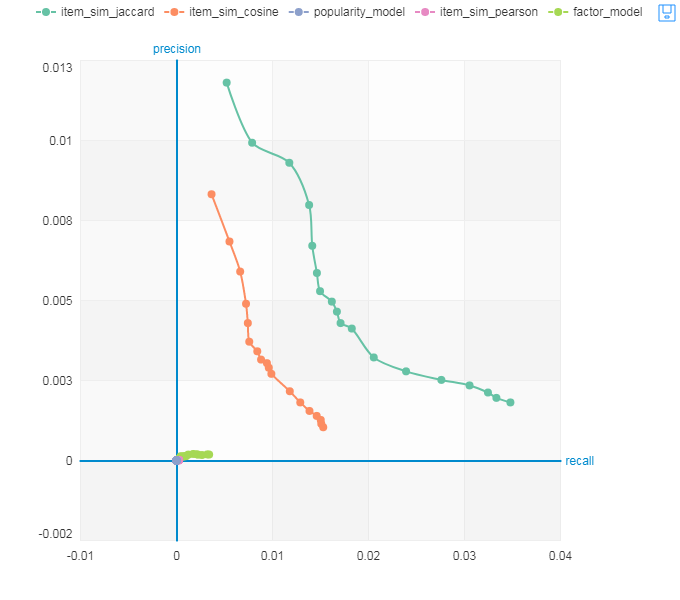

In [22]:
Image(filename='eval1.png') # graphlab display output is captured

## Model evaluation/ RMSE

The mean RMSE value with 10-fold cross-validation with the chosen best model was 7.82, which is very higher than the RMSE value(1.628) found using the Scikit-Surprice model.  

In [23]:
folds = gl.cross_validation.KFold(SF_ratings, 10)
resultRMSE = []
for train, valid in folds:
    m = gl.item_similarity_recommender.create(train, user_id='user_id', 
                                                       item_id='ISBN', target='rating', similarity_type='jaccard',
                                                        threshold=0.01, only_top_k= 64)  # <-- grid search optimized
    evalResult = m.evaluate(valid)
    resultRMSE.append(evalResult['rmse_overall'])

Recsys training: model = item_similarity

Preparing data set.

Data has 390303 observations with 70690 users and 173400 items.

Data prepared in: 0.597034s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 11.25      |

| 13ms                           | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 1.87s                               | 0                | 0               |

| 2.87s                               | 44.75            | 77918           |

| 3.88s                               | 99.5             | 172953          |

| 4.87s                               | 99.75            | 173114          |

| 6.36s                               | 100              | 173400          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 6.53937s

recommendations finished on 1000/7116 queries. users per second: 440.503

recommendations finished on 2000/7116 queries. users per second: 441.573

recommendations finished on 3000/7116 queries. users per second: 440.568


Precision and recall summary statistics by cutoff


recommendations finished on 4000/7116 queries. users per second: 440.164

recommendations finished on 5000/7116 queries. users per second: 440.387

recommendations finished on 6000/7116 queries. users per second: 440.633

recommendations finished on 7000/7116 queries. users per second: 441.894

+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00238898257448 | 0.000465146901749 |
|   2    | 0.00358347386172 |  0.00148592542201 |
|   3    | 0.00407532321529 |  0.00270623082089 |
|   4    | 0.00418071950534 |  0.00410005998533 |
|   5    | 0.00387858347386 |  0.00464371292272 |
|   6    | 0.00377084504403 |  0.00546619760876 |
|   7    | 0.00413554966675 |  0.00732767638175 |
|   8    | 0.00467256885891 |  0.0103362332828  |
|   9    | 0.00446567984511 |  0.0109852700561  |
|   10   | 0.0043844856661  |  0.0119356436847  |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.743148788084687)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  278755 |   1   | 0.997671750784 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per Use

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 70069 users and 172077 items.

Data prepared in: 0.579033s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 4.25       |

| 19.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.16s                               | 0                | 0               |

| 3.18s                               | 85.5             | 147341          |

| 4.16s                               | 98.75            | 170245          |

| 5.81s                               | 99.75            | 171977          |

| 7.57s                               | 100              | 172077          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 7.76944s

recommendations finished on 1000/7738 queries. users per second: 444.814

recommendations finished on 2000/7738 queries. users per second: 444.715

recommendations finished on 3000/7738 queries. users per second: 444.617

recommendations finished on 4000/7738 queries. users per second: 444.617


Precision and recall summary statistics by cutoff


recommendations finished on 5000/7738 queries. users per second: 444.854

recommendations finished on 6000/7738 queries. users per second: 444.65

recommendations finished on 7000/7738 queries. users per second: 444.645

+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.0052985267511  | 0.00207897476329 |
|   2    | 0.00342465753425 | 0.00233279953558 |
|   3    | 0.0037477384337  | 0.00366309413019 |
|   4    | 0.00546006720083 | 0.00712457539669 |
|   5    | 0.00498836908762 | 0.00812758566739 |
|   6    | 0.00471698113208 | 0.00896765997043 |
|   7    | 0.0041908208101  | 0.00901541314701 |
|   8    | 0.00439390023262 | 0.0108277992645  |
|   9    | 0.00429338617501 | 0.0113795434567  |
|   10   | 0.00431636081675 | 0.0128333423091  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.769866115796431)

Per User RMSE (best)
+---------+-------+------+
| user_id | count | rmse |
+---------+-------+------+
|  28230  |   1   | 1.0  |
+---------+-------+------+
[1 rows x 3 columns]


Per User RMSE (worst)
+---------+-------+------+
| user_id | count | rm

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69906 users and 172062 items.

Data prepared in: 0.606035s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2ms                            | 2.75       |

| 14.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.10s                               | 0                | 0               |

| 3.10s                               | 80.75            | 139120          |

| 4.59s                               | 99.75            | 171716          |

| 5.71s                               | 99.75            | 171944          |

| 7.49s                               | 100              | 172062          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 7.67344s

recommendations finished on 1000/7901 queries. users per second: 444.419

recommendations finished on 2000/7901 queries. users per second: 445.012

recommendations finished on 3000/7901 queries. users per second: 445.343

recommendations finished on 4000/7901 queries. users per second: 445.26

recommendations finished on 5000/7901 queries. users per second: 445.25

recommendations finished on 6000/7901 queries. users per second: 445.211

recommendations finished on 7000/7901 queries. users per second: 445.267


Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00227819263384 | 0.000583810337449 |
|   2    | 0.00202506011897 |  0.00111792754143 |
|   3    | 0.00257351390119 |  0.00191537516819 |
|   4    | 0.00303759017846 |  0.00289890014079 |
|   5    | 0.00324009619036 |   0.004220120156  |
|   6    | 0.00314306205965 |  0.00468424046288 |
|   7    | 0.00294718570886 |  0.00525274922885 |
|   8    | 0.00273699531705 |  0.00555962383581 |
|   9    | 0.00281258349857 |  0.00671346488909 |
|   10   | 0.00301227692697 |  0.00832652416857 |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.9968895503663076)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  69980  |   2   | 0.994035134469 |
+---------+----

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 71229 users and 170877 items.

Data prepared in: 0.592034s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 2.75       |

| 13.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.09s                               | 0                | 0               |

| 3.10s                               | 67.75            | 116127          |

| 4.09s                               | 96.25            | 164482          |

| 5.19s                               | 99.75            | 170519          |

| 6.84s                               | 100              | 170877          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 7.0044s

recommendations finished on 1000/6577 queries. users per second: 448.606

recommendations finished on 2000/6577 queries. users per second: 449.413

recommendations finished on 3000/6577 queries. users per second: 449.278

recommendations finished on 4000/6577 queries. users per second: 449.412

recommendations finished on 5000/6577 queries. users per second: 449.413

recommendations finished on 6000/6577 queries. users per second: 449.312


Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00395317013836 | 0.000766168803893 |
|   2    | 0.00402919264102 |  0.00200826916894 |
|   3    | 0.0034970351224  |  0.00222089208043 |
|   4    | 0.00345902387107 |  0.00328002926076 |
|   5    | 0.00331458111601 |  0.00370434410856 |
|   6    | 0.00339567178552 |  0.0048403333644  |
|   7    | 0.0034535936923  |  0.00598344633892 |
|   8    | 0.00332598449141 |  0.00627318946087 |
|   9    | 0.00319294511175 |  0.00685307621789 |
|   10   | 0.00357305762506 |  0.00924956038169 |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.945184091897143)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  87648  |   1   | 0.993203783035 |
+---------+-----

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69680 users and 173987 items.

Data prepared in: 0.569033s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 24.25      |

| 13.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.13s                               | 0                | 0               |

| 3.13s                               | 46.5             | 80934           |

| 4.13s                               | 97.5             | 169899          |

| 5.43s                               | 98               | 170760          |

| 6.93s                               | 99.75            | 173753          |

| 8.85s                               | 100              | 173987          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 9.03152s

recommendations finished on 1000/8125 queries. users per second: 438.956

recommendations finished on 2000/8125 queries. users per second: 439.053

recommendations finished on 3000/8125 queries. users per second: 439.278

recommendations finished on 4000/8125 queries. users per second: 439.584


Precision and recall summary statistics by cutoff


recommendations finished on 5000/8125 queries. users per second: 439.613

recommendations finished on 6000/8125 queries. users per second: 439.6

recommendations finished on 7000/8125 queries. users per second: 439.48

recommendations finished on 8000/8125 queries. users per second: 439.946

+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00369230769231 | 0.000783452404565 |
|   2    | 0.00363076923077 |  0.00223817770078 |
|   3    | 0.00414358974359 |  0.00353529112818 |
|   4    | 0.00403076923077 |  0.00473041635652 |
|   5    | 0.00497230769231 |  0.00757144793043 |
|   6    | 0.00475897435897 |  0.00833456274907 |
|   7    | 0.00478241758242 |  0.00996894355244 |
|   8    | 0.00450769230769 |  0.0107880033117  |
|   9    | 0.00418461538462 |  0.0109498916697  |
|   10   | 0.00396307692308 |  0.0112973683086  |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.789154187456469)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  105648 |   1   | 0.995782088041 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per Use

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69846 users and 173223 items.

Data prepared in: 0.632037s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 2.75       |

| 13ms                           | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.24s                               | 0                | 0               |

| 3.25s                               | 74.5             | 129451          |

| 4.25s                               | 91.75            | 159042          |

| 5.97s                               | 98.75            | 171419          |

| 8.01s                               | 100              | 173223          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.19447s

recommendations finished on 1000/7960 queries. users per second: 439.922

recommendations finished on 2000/7960 queries. users per second: 440.892

recommendations finished on 3000/7960 queries. users per second: 441.411

recommendations finished on 4000/7960 queries. users per second: 441.427


Precision and recall summary statistics by cutoff


recommendations finished on 5000/7960 queries. users per second: 441.437

recommendations finished on 6000/7960 queries. users per second: 441.443

recommendations finished on 7000/7960 queries. users per second: 441.476

+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00515075376884 | 0.00126843408561 |
|   2    | 0.00445979899497 | 0.00222843588118 |
|   3    | 0.00481574539363 | 0.00375282482656 |
|   4    | 0.00411432160804 | 0.00412133188551 |
|   5    | 0.00540201005025 | 0.00762061752025 |
|   6    | 0.00510887772194 | 0.00849540285525 |
|   7    | 0.00457645369706 | 0.00869671005569 |
|   8    | 0.00463253768844 | 0.00989877676212 |
|   9    | 0.00429927414852 | 0.0101313842845  |
|   10   | 0.0041959798995  | 0.0109659187427  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.816324591874318)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  136307 |   1   | 0.995774459839 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE (worst)

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69849 users and 172612 items.

Data prepared in: 0.549032s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 1.25       |

| 13.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.11s                               | 0                | 0               |

| 3.11s                               | 80.25            | 138836          |

| 4.11s                               | 93.25            | 161332          |

| 6.12s                               | 98.25            | 169689          |

| 7.13s                               | 99               | 171088          |

| 9.25s                               | 100              | 172612          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 9.45554s

recommendations finished on 1000/7958 queries. users per second: 441.671

recommendations finished on 2000/7958 queries. users per second: 442.453

recommendations finished on 3000/7958 queries. users per second: 442.779

recommendations finished on 4000/7958 queries. users per second: 442.697

recommendations finished on 5000/7958 queries. users per second: 442.727

recommendations finished on 6000/7958 queries. users per second: 442.714


Precision and recall summary statistics by cutoff


recommendations finished on 7000/7958 queries. users per second: 442.872

+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00439808997235 | 0.00102544787208 |
|   2    | 0.00414677054536 | 0.00219195910279 |
|   3    | 0.00578034682081 | 0.00478286978715 |
|   4    | 0.00540336768032 | 0.00562636130406 |
|   5    | 0.00469967328474 | 0.00617465888093 |
|   6    | 0.00418865711653 | 0.00624859573386 |
|   7    | 0.00396725666894 | 0.00685739704792 |
|   8    | 0.00413106308118 | 0.00821566009581 |
|   9    | 0.00382564016643 | 0.00827156644048 |
|   10   | 0.00379492334757 | 0.00911229055143 |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.772673538136355)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  188263 |   1   | 0.999221137762 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE (worst)

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69375 users and 172176 items.

Data prepared in: 0.585034s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 0us                            | 18.5       |

| 14ms                           | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.08s                               | 0                | 127             |

| 3.08s                               | 44.75            | 77322           |

| 4.08s                               | 63.75            | 109770          |

| 7.16s                               | 99.5             | 171333          |

| 9.07s                               | 100              | 172176          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 9.26753s

recommendations finished on 1000/8431 queries. users per second: 444.222

recommendations finished on 2000/8431 queries. users per second: 443.63

recommendations finished on 3000/8431 queries. users per second: 444.156

recommendations finished on 4000/8431 queries. users per second: 444.419

recommendations finished on 5000/8431 queries. users per second: 444.459

recommendations finished on 6000/8431 queries. users per second: 444.419

recommendations finished on 7000/8431 queries. users per second: 444.391

recommendations finished on 8000/8431 queries. users per second: 444.444


Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00166053848891 | 0.000510998720899 |
|   2    | 0.00260941762543 |  0.00103379451736 |
|   3    | 0.00359783339264 |  0.00269643655029 |
|   4    | 0.00343968686988 |  0.00323687605528 |
|   5    | 0.00332107697782 |  0.00375003126216 |
|   6    | 0.00347922350057 |  0.00447192373074 |
|   7    | 0.00333802124811 |  0.00479975751597 |
|   8    | 0.00315798837623 |  0.00506741851789 |
|   9    | 0.00321564596265 |  0.00624935283712 |
|   10   | 0.00329735499941 |  0.00751334254101 |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.69717963728284)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  202315 |   1   | 0.999138174057 |
+---------+------

Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 70143 users and 173865 items.

Data prepared in: 0.559032s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1ms                            | 1.25       |

| 13.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.25s                               | 0                | 0               |

| 3.25s                               | 21.75            | 38177           |

| 4.25s                               | 96.75            | 168500          |

| 6.29s                               | 99               | 172549          |

| 8.73s                               | 100              | 173865          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.93851s

recommendations finished on 1000/7663 queries. users per second: 437.42

recommendations finished on 2000/7663 queries. users per second: 438.668

recommendations finished on 3000/7663 queries. users per second: 438.828


Precision and recall summary statistics by cutoff


recommendations finished on 4000/7663 queries. users per second: 439.149

recommendations finished on 5000/7663 queries. users per second: 439.304

recommendations finished on 6000/7663 queries. users per second: 439.214

recommendations finished on 7000/7663 queries. users per second: 439.122

+--------+------------------+------------------+
| cutoff |  mean_precision  |   mean_recall    |
+--------+------------------+------------------+
|   1    | 0.00391491582931 | 0.00121116855605 |
|   2    | 0.00469789899517 | 0.00339162318637 |
|   3    | 0.00687285223368 | 0.00660069197455 |
|   4    | 0.00616599243116 | 0.00710215976049 |
|   5    |  0.005298186089  | 0.00748608217776 |
|   6    | 0.00504589151333 | 0.00817116171127 |
|   7    | 0.00473518390783 | 0.00900961687132 |
|   8    | 0.00453477750228 | 0.00999257956309 |
|   9    | 0.00468339930691 | 0.0116719568082  |
|   10   | 0.00459350123972 | 0.0123305201952  |
+--------+------------------+------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.84556650951868)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  226010 |   1   | 0.995465949774 |
+---------+-------+----------------+
[1 rows x 3 columns]


Per User RMSE (worst)


Recsys training: model = item_similarity

Preparing data set.

Data has 390304 observations with 69464 users and 173058 items.

Data prepared in: 0.618035s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.001ms                        | 15.75      |

| 13.001ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 2.11s                               | 0                | 0               |

| 3.11s                               | 80               | 138690          |

| 4.11s                               | 92.5             | 160468          |

| 6.08s                               | 99.25            | 172133          |

| 6.11s                               | 99.5             | 172253          |

| 8.27s                               | 100              | 173058          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 8.49349s

recommendations finished on 1000/8342 queries. users per second: 440.309

recommendations finished on 2000/8342 queries. users per second: 439.439

recommendations finished on 3000/8342 queries. users per second: 439.407

recommendations finished on 4000/8342 queries. users per second: 439.874

recommendations finished on 5000/8342 queries. users per second: 439.729

recommendations finished on 6000/8342 queries. users per second: 439.793

recommendations finished on 7000/8342 queries. users per second: 440.06

recommendations finished on 8000/8342 queries. users per second: 439.415


Precision and recall summary statistics by cutoff
+--------+------------------+-------------------+
| cutoff |  mean_precision  |    mean_recall    |
+--------+------------------+-------------------+
|   1    | 0.00143850395589 | 0.000326907673703 |
|   2    | 0.00263725725246 |   0.001626457637  |
|   3    | 0.00279709102533 |  0.00270167029909 |
|   4    | 0.00458523135939 |  0.00543488124593 |
|   5    | 0.00405178614241 |  0.00576222114261 |
|   6    | 0.00413569887317 |  0.00723523818412 |
|   7    | 0.00375038531356 |  0.00741850078455 |
|   8    | 0.00380604171661 |  0.00827996300234 |
|   9    | 0.00360957937079 |  0.00862059312605 |
|   10   | 0.0037760728842  |  0.00964602654795 |
+--------+------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 7.829650169683066)

Per User RMSE (best)
+---------+-------+---------------+
| user_id | count |      rmse     |
+---------+-------+---------------+
|  256849 |   1   | 0.99960975647 |
+---------+-------+-

In [24]:
# 10-fold cross-validation restult
print '\nRMSE for Each Fold:\n', pd.DataFrame({'RMSE': resultRMSE})
print '\nMean RMSE = ', np.mean(resultRMSE)


RMSE for Each Fold:
       RMSE
0  7.743149
1  7.769866
2  7.996890
3  7.945184
4  7.789154
5  7.816325
6  7.772674
7  7.697180
8  7.845567
9  7.829650

Mean RMSE =  7.82056371801


# Deployment/ Recommended output

Recommended item/book can be generated easily by using the GraphLab function, recommend.  Unlike the Surprise library, GraphLab library has more functions and everything was well organized including documentations.  However, GraphLab was only ran using Python version 2.7 so that was very inconvinient.  

In [25]:
#Make Recommendations:
item_recomm = m.recommend(users=[1],k=5)
item_recomm

user_id,ISBN,score,rank
1,044021145X,0.0144134831429,1
1,0060928336,0.0132393491268,2
1,0142001740,0.0131058561802,3
1,0316666343,0.0131037318707,4
1,0743418174,0.0126280117035,5
